In [1]:
#comenzamos importando librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder


In [3]:
df=pd.read_csv('/kaggle/input/bmw-pricing-v3-csv/bmw_pricing_v3.csv')


In [4]:
#Vemos que tenemos dentro del archivo:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [6]:
#Que columnas tiene

In [7]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [8]:
#ver filas x columnas

In [9]:
df.shape

(4843, 18)

In [10]:
#vemos duplicados? No hay duplicados en el Data Base seleccionado

In [11]:
df[df.duplicated()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [12]:
#Ahora buscamos los Nulos

In [13]:
df.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [14]:
df['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [15]:
#HAGO UNA COPIA = DF1

In [16]:
df1=df.copy()

In [17]:
#Si vemos la columna "Marca" todas las marcas son BMW por lo tanto podemos eliminar la columna BWM para no tener exceso de datos.

In [18]:
df1 = df1.drop('marca', axis=1)

In [19]:
df1.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [20]:
#En modelo que tenemos? Hay NaS dando vuelta --> son 3 de Modelo . Para mi la columna "modelo" es uno de los datos más importantes.

In [21]:
df1.loc[df1['modelo'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


In [22]:
#Eliminamos los NA de Modelo que son 3 y es muy dificil inferirlo por el resto de los datos

In [23]:
df1.dropna(subset=['modelo'],inplace=True)

In [24]:
df1.isnull().sum()

modelo                            0
km                                2
potencia                          1
fecha_registro                 2421
tipo_gasolina                     5
color                           445
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            6
fecha_venta                       1
dtype: int64

In [25]:
#Que otros NA, analizo KM:

In [26]:
df1.loc[df1['km'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,NaN,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


In [27]:
#Hago una mediana de los kilometros asimilando el mismo modelo:

In [28]:
df1['fecha_registro'] = pd.to_datetime(df1['fecha_registro'])

In [29]:
#Hago un FILLNA agrupando por la mediana de los kilometros por modelo

In [30]:
df1['km'] = df1['km'].fillna(df.groupby('modelo')['km'].transform('median'))

In [31]:
#Ya no tengo nulos de "kms":

In [32]:
df1.loc[df1['km'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [33]:
df1.isnull().sum()

modelo                            0
km                                0
potencia                          1
fecha_registro                 2421
tipo_gasolina                     5
color                           445
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            6
fecha_venta                       1
dtype: int64

In [34]:
#Voy con la potencia a ver:

In [35]:
df1.loc[df1['potencia'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,NaN,False,False,True,True,18700.0,2018-03-01


In [36]:
df1['potencia'].unique()

array([100., 317., 120., 135., 160., 225., 145., 105., 125., 130., 270.,
       110., 140., 180.,  85., 190., 236., 240., 250., 230., 309., 170.,
       142., 155., 210.,  nan, 122., 200.,  90., 150., 141., 173., 137.,
       280., 112., 189.,  80., 119.,  95., 220., 107., 127.,  25.,  70.,
       192., 101.,  75., 239., 235.,  87.,  66.,  77., 195., 183., 233.,
       121., 224., 412.,   0., 423., 300., 261.])

In [37]:
modelo_525 = df1[df1['modelo'] == '525']
distinct_potencias = modelo_525['potencia'].unique()
print(distinct_potencias)

[160.  nan 120. 150. 141. 155. 130. 145.  85. 105.]


In [38]:
#ELIMINO la linea de "potencia" ya ques un solo valor  y tengo demasiadas tipos de potencias para poder inferirlo

In [39]:
df1 = df1.dropna(subset=['potencia'])

In [40]:
df1.reset_index(drop=True,inplace=True)

In [41]:
df1.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2421
tipo_gasolina                     5
color                           445
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3387
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            6
fecha_venta                       1
dtype: int64

In [42]:
df1.shape

(4839, 17)

In [43]:
#VEMOS LA FECHA REGISTRO:

In [44]:
df1.loc[df1['fecha_registro'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
6,325,205219.0,145.0,NaT,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
8,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,218 Gran Tourer,47782.0,110.0,NaT,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01
4831,218 Active Tourer,165707.0,110.0,NaT,diesel,black,van,False,True,False,NaN,False,NaN,True,True,13600.0,2018-07-01
4833,218 Gran Tourer,66770.0,110.0,NaT,diesel,blue,van,False,True,False,NaN,False,False,True,False,13400.0,2018-07-01
4834,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01


In [45]:
#Algunas comprobaciones :

In [46]:
df1.loc[df1['tipo_gasolina'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,NaT,NaN,black,NaN,False,False,False,False,False,False,False,False,18400.0,2018-03-01
183,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,NaN,False,False,False,True,2400.0,2018-04-01
442,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,NaN,False,False,True,True,15400.0,2018-02-01
478,318,170350.0,105.0,NaT,NaN,white,NaN,False,True,False,NaN,False,False,True,False,10200.0,2018-02-01
628,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01


In [47]:
df1[df1['modelo'] == "318"]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
25,318,196092.0,85.0,1995-10-01,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,NaT,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
46,318,187104.0,105.0,2001-09-01,petrol,red,convertible,True,False,False,False,False,True,True,False,2600.0,2018-08-01
152,318,108245.0,100.0,2013-03-01,diesel,NaN,estate,True,True,True,NaN,False,False,True,False,11700.0,2018-01-01
154,318,101658.0,100.0,NaT,diesel,grey,NaN,False,True,False,False,False,False,True,False,11400.0,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,318,136709.0,100.0,2012-06-01,diesel,brown,sedan,True,True,True,NaN,False,False,True,False,11700.0,2018-09-01
3617,318,249257.0,100.0,NaT,diesel,blue,sedan,True,True,False,NaN,False,False,True,False,5700.0,2018-09-01
3621,318,99262.0,100.0,NaT,diesel,blue,sedan,True,NaN,True,False,False,False,True,True,13800.0,2018-09-01
3657,318,212836.0,85.0,NaT,diesel,silver,subcompact,False,False,False,False,False,False,True,False,1400.0,2018-02-01


In [48]:
#NO ENCUENTRO RELACION PARA AGREGAR TIPO DE GASOLINA A LOS DATOS : LOS HE ELIMINADO PORQUE SON 5 REGISTROS SOLAMENTE y No quiero que distorsionen la base de datos

In [49]:
df1 = df1.dropna(subset=['tipo_gasolina'])

In [50]:
df1.reset_index(drop=True,inplace=True)

In [51]:
df1.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2419
tipo_gasolina                     0
color                           445
tipo_coche                     1456
volante_regulable                 4
aire_acondicionado              485
camara_trasera                    2
asientos_traseros_plegables    3383
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            6
fecha_venta                       1
dtype: int64

In [52]:
df1.loc[df1['color'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,120,174631.0,120.0,2009-01-01,diesel,NaN,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,325,205474.0,145.0,2009-05-01,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
25,318,196092.0,85.0,1995-10-01,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,NaT,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
47,420,20996.0,135.0,2014-05-01,petrol,NaN,coupe,True,False,False,NaN,True,False,True,False,21400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,X4,61989.0,140.0,2014-12-01,diesel,NaN,NaN,False,False,False,NaN,False,NaN,False,True,28600.0,2018-09-01
4769,X5,285669.0,173.0,2007-08-01,diesel,NaN,NaN,True,True,False,NaN,True,False,True,True,9300.0,2018-09-01
4796,218 Active Tourer,35382.0,110.0,NaT,diesel,NaN,van,False,NaN,False,NaN,False,NaN,True,True,13100.0,2018-02-01
4809,X3,110039.0,130.0,2009-07-01,diesel,NaN,NaN,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01


In [53]:
#COLORES

In [54]:
df1['color'].unique()

array(['black', 'grey', 'white', 'red', 'silver', 'blue', nan, 'orange',
       'beige', 'brown', 'green'], dtype=object)

In [55]:
#COMO NO ENCUENTRO NINGUNA RELACION DE LOS COLORES PERO TAMPOCO VEMOS OPORTUNIDAD DE ELIMINARLOS PORQUE SON MUCHOS, LE ASIGNO UN SIN COLOR

In [56]:
df1['color'].fillna('SIN_COLOR',inplace=True)

In [57]:
df1.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2419
tipo_gasolina                     0
color                             0
tipo_coche                     1456
volante_regulable                 4
aire_acondicionado              485
camara_trasera                    2
asientos_traseros_plegables    3383
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            6
fecha_venta                       1
dtype: int64

In [58]:
#VAMOS A TIPO DE COCHES

In [59]:
df1['tipo_coche'].unique()

array([nan, 'convertible', 'coupe', 'estate', 'hatchback', 'sedan',
       'subcompact', 'suv', 'van'], dtype=object)

In [60]:
df1.loc[df1['tipo_coche'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
11,325,228000.0,145.0,NaT,diesel,black,NaN,True,True,False,False,True,False,True,NaN,13300.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,216 Gran Tourer,48012.0,85.0,2016-02-01,diesel,blue,NaN,True,True,False,False,False,True,True,NaN,15600.0,2018-06-01
4825,218 Gran Tourer,47782.0,110.0,NaT,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01
4829,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4830,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01


In [61]:
tipo_coche_por_modelo = df1.groupby('modelo')['tipo_coche'].unique()

for modelo, tipo_coches in tipo_coche_por_modelo.items():
    print("Modelo:", modelo)
    print("Tipo de coche:", tipo_coches)
    print()

Modelo:  Active Tourer
Tipo de coche: ['van']

Modelo: 114
Tipo de coche: ['hatchback' nan 'subcompact']

Modelo: 116
Tipo de coche: ['estate' nan 'hatchback' 'sedan' 'subcompact']

Modelo: 118
Tipo de coche: [nan 'convertible' 'coupe' 'hatchback' 'sedan' 'subcompact']

Modelo: 120
Tipo de coche: ['convertible' nan 'hatchback' 'sedan' 'subcompact']

Modelo: 123
Tipo de coche: ['hatchback' nan]

Modelo: 125
Tipo de coche: ['hatchback']

Modelo: 135
Tipo de coche: ['convertible' 'coupe' 'hatchback']

Modelo: 214 Gran Tourer
Tipo de coche: ['van']

Modelo: 216
Tipo de coche: ['van']

Modelo: 216 Active Tourer
Tipo de coche: ['van']

Modelo: 216 Gran Tourer
Tipo de coche: ['van' nan]

Modelo: 218
Tipo de coche: ['convertible' nan 'coupe' 'van']

Modelo: 218 Active Tourer
Tipo de coche: ['van' nan]

Modelo: 218 Gran Tourer
Tipo de coche: [nan 'van']

Modelo: 220
Tipo de coche: ['convertible' nan 'coupe']

Modelo: 220 Active Tourer
Tipo de coche: ['van']

Modelo: 225
Tipo de coche: ['coupe']

In [62]:
#Veo que me hes dificil saber que valor es NAN dentro de Tipo de coche, no quiero arriesgarme a introducir un valor que distorsione , ademas es algo cualitativo y no creo que tenga tanta relevancia.


In [63]:
df1['tipo_coche'].fillna('SIN_DATO', inplace=True)


In [64]:
df1.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2419
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 4
aire_acondicionado              485
camara_trasera                    2
asientos_traseros_plegables    3383
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            6
fecha_venta                       1
dtype: int64

In [65]:
#Con Volante Regulable no encuntro una lógica para asignar un valor o no. Le asigno SIN_DATO

In [66]:
df1.loc[df1['volante_regulable'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,320,93066.0,135.0,2013-01-01,diesel,black,coupe,NaN,False,False,NaN,True,False,True,NaN,11900.0,2018-06-01
269,318,195032.0,100.0,2008-01-01,diesel,grey,SIN_DATO,NaN,NaN,False,False,False,False,True,False,4900.0,2018-01-01
483,320,227691.0,135.0,NaT,diesel,black,SIN_DATO,NaN,True,False,False,False,True,True,False,10500.0,2018-02-01
608,318,201626.0,105.0,2013-10-01,diesel,black,SIN_DATO,NaN,NaN,False,NaN,True,False,True,True,11700.0,2018-03-01


In [67]:
df1[df1['modelo']=='318']

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
25,318,196092.0,85.0,1995-10-01,petrol,SIN_COLOR,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,NaT,petrol,SIN_COLOR,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
46,318,187104.0,105.0,2001-09-01,petrol,red,convertible,True,False,False,False,False,True,True,False,2600.0,2018-08-01
151,318,108245.0,100.0,2013-03-01,diesel,SIN_COLOR,estate,True,True,True,NaN,False,False,True,False,11700.0,2018-01-01
153,318,101658.0,100.0,NaT,diesel,grey,SIN_DATO,False,True,False,False,False,False,True,False,11400.0,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,318,136709.0,100.0,2012-06-01,diesel,brown,sedan,True,True,True,NaN,False,False,True,False,11700.0,2018-09-01
3612,318,249257.0,100.0,NaT,diesel,blue,sedan,True,True,False,NaN,False,False,True,False,5700.0,2018-09-01
3616,318,99262.0,100.0,NaT,diesel,blue,sedan,True,NaN,True,False,False,False,True,True,13800.0,2018-09-01
3652,318,212836.0,85.0,NaT,diesel,silver,subcompact,False,False,False,False,False,False,True,False,1400.0,2018-02-01


In [68]:
#Lleno los NA

In [69]:
df1['volante_regulable'].fillna('SIN_DATO', inplace=True)
df1['aire_acondicionado'].fillna('SIN_DATO', inplace=True)
df1['camara_trasera'].fillna('SIN_DATO', inplace=True)
df1['asientos_traseros_plegables'].fillna('SIN_DATO', inplace=True)
df1['elevalunas_electrico'].fillna('SIN_DATO', inplace=True)
df1['bluetooth'].fillna('SIN_DATO', inplace=True)
df1['alerta_lim_velocidad'].fillna('SIN_DATO', inplace=True)

In [70]:
df1.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2419
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            6
fecha_venta                       1
dtype: int64

In [71]:
df1.loc[df1['precio'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
116,420,174740.0,135.0,2013-11-01,diesel,SIN_COLOR,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
518,520,163803.0,135.0,NaT,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01
533,316,34489.0,85.0,NaT,diesel,black,estate,True,False,False,SIN_DATO,False,False,True,False,NaN,2018-02-01
543,318,157129.0,100.0,NaT,diesel,blue,estate,True,SIN_DATO,True,False,True,False,True,True,NaN,2018-03-01
563,320,166866.0,120.0,NaT,diesel,blue,SIN_DATO,True,True,False,SIN_DATO,True,True,True,True,NaN,2018-03-01
578,320,114771.0,135.0,NaT,diesel,blue,SIN_DATO,False,True,False,SIN_DATO,False,False,True,False,NaN,2018-03-01


In [72]:
#Como son solo 6 precios y no quiero que me distorsionen la realidad del resto de los variables (y no generar una profecia autocumplida)prefiero borrar estos datos del dataset.

In [73]:
df1 = df1.dropna(subset=['precio'])

In [74]:
df1.reset_index(drop=True,inplace=True)

In [75]:
df1.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2414
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            0
fecha_venta                       1
dtype: int64

In [76]:
#Algunos graficos para entender ciertas cotas:

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

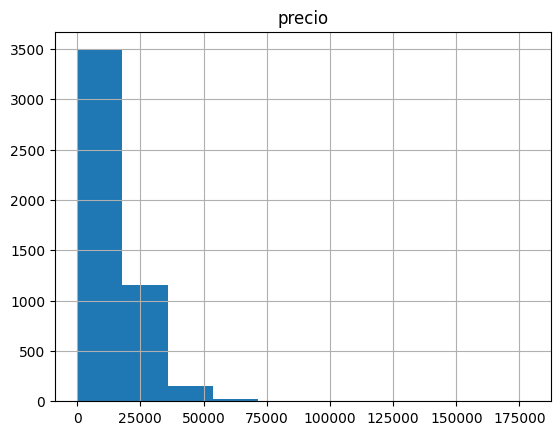

In [77]:
df1.hist("precio")

array([[<Axes: title={'center': 'fecha_registro'}>]], dtype=object)

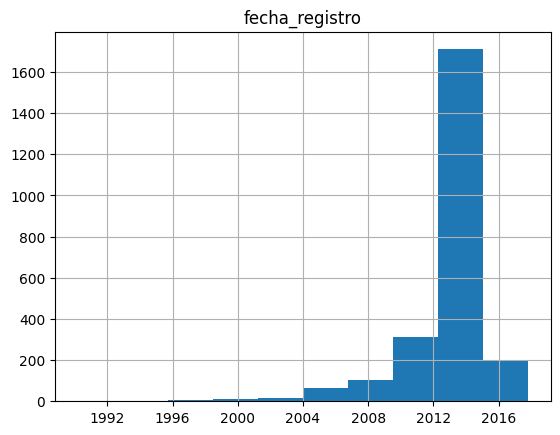

In [78]:
df1.hist("fecha_registro")

array([[<Axes: title={'center': 'km'}>]], dtype=object)

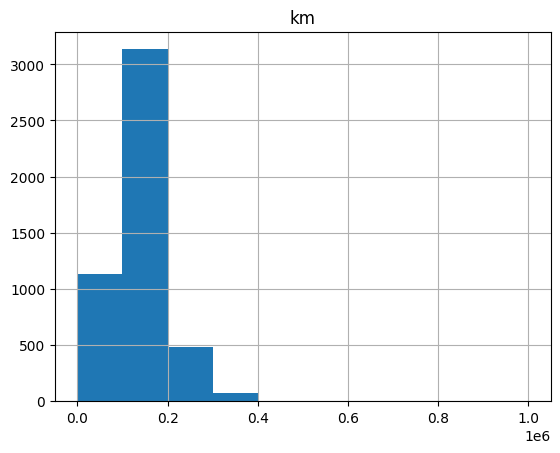

In [79]:
df1.hist("km")

In [80]:
#Vamos a ver que hay dentro de Fecha_Venta: Al ver que no tiene muchos datos importantes ya que tampoco tiene  el dato de fecha_venta, eliminamos esta fila.

In [81]:
df1.loc[df1['fecha_venta'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
582,525,269290.0,120.0,NaT,diesel,silver,SIN_DATO,True,False,True,SIN_DATO,False,False,True,True,4200.0,NaN


In [82]:
df1 = df1.dropna(subset=['fecha_venta'])

In [83]:
df1.reset_index(drop=True,inplace=True)

In [84]:
#Volvemos a fecha registro:

In [85]:
df1.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2413
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            0
fecha_venta                       0
dtype: int64

In [86]:
df1.loc[df1['fecha_registro'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,SIN_DATO,False,True,True,True,69700.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,SIN_DATO,True,True,True,SIN_DATO,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,SIN_DATO,True,True,False,False,False,True,True,True,33400.0,2018-04-01
6,325,205219.0,145.0,NaT,diesel,grey,convertible,True,True,False,SIN_DATO,True,True,True,True,12400.0,2018-02-01
8,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,False,False,False,SIN_DATO,True,False,6200.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,218 Gran Tourer,47782.0,110.0,NaT,diesel,blue,SIN_DATO,False,SIN_DATO,False,SIN_DATO,False,False,True,True,14900.0,2018-07-01
4819,218 Active Tourer,165707.0,110.0,NaT,diesel,black,van,False,True,False,SIN_DATO,False,SIN_DATO,True,True,13600.0,2018-07-01
4821,218 Gran Tourer,66770.0,110.0,NaT,diesel,blue,van,False,True,False,SIN_DATO,False,False,True,False,13400.0,2018-07-01
4822,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,SIN_DATO,False,True,False,SIN_DATO,False,False,True,False,14600.0,2018-08-01


In [87]:
df1.head(50)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,SIN_DATO,True,True,False,SIN_DATO,True,SIN_DATO,True,SIN_DATO,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,SIN_DATO,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,SIN_DATO,False,False,False,SIN_DATO,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,SIN_DATO,True,True,True,SIN_DATO,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,SIN_DATO,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01,petrol,black,SIN_DATO,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,325,205219.0,145.0,NaT,diesel,grey,convertible,True,True,False,SIN_DATO,True,True,True,True,12400.0,2018-02-01
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,SIN_DATO,False,True,True,False,6100.0,2018-02-01
8,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,False,False,False,SIN_DATO,True,False,6200.0,2018-03-01
9,320,139541.0,135.0,NaT,diesel,white,convertible,False,False,False,SIN_DATO,True,False,True,False,17300.0,2018-03-01


In [88]:
df1['fecha_venta'] = pd.to_datetime(df1['fecha_venta'])

In [89]:
print(df1['fecha_venta'].dtype)
print(df1['fecha_registro'].dtype)

datetime64[ns]
datetime64[ns]


In [90]:
# df1['venta_menos_compra'] = df1['fecha_venta'] - df1['fecha_registro']

In [91]:
df1.head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,SIN_DATO,True,True,False,SIN_DATO,True,SIN_DATO,True,SIN_DATO,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,SIN_DATO,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,SIN_DATO,False,False,False,SIN_DATO,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,SIN_DATO,True,True,True,SIN_DATO,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,SIN_DATO,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01,petrol,black,SIN_DATO,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,325,205219.0,145.0,NaT,diesel,grey,convertible,True,True,False,SIN_DATO,True,True,True,True,12400.0,2018-02-01
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,SIN_DATO,False,True,True,False,6100.0,2018-02-01
8,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,False,False,False,SIN_DATO,True,False,6200.0,2018-03-01
9,320,139541.0,135.0,NaT,diesel,white,convertible,False,False,False,SIN_DATO,True,False,True,False,17300.0,2018-03-01


In [92]:
2#CREAMOS UNA COPIA LLAMADA DF2

2

In [93]:
df2=df1.copy()

In [94]:

# Aqui Busco el rango que quiero usar para los precios
rango_precios = pd.cut(df2['precio'], bins=10)

# Creo una función para poder ubicar cada grupo
def fillna_conmedianadegrupo(group):
    if group['fecha_registro'].notnull().any():  # Verificar si hay valores no nulos en el grupo
        valor_mediana = group['fecha_registro'].median()
        group['fecha_registro'] = group['fecha_registro'].fillna(valor_mediana)
    return group

# Aplicamos la función a cada grupo, con el apply lo hacemos con todos
df2 = df2.groupby(['tipo_coche', df2['fecha_venta'].dt.year, rango_precios]).apply(fillna_conmedianadegrupo).reset_index(drop=True)

In [95]:
df2.loc[df2['fecha_registro'].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1453,330,142483.0,180.0,NaT,diesel,blue,convertible,True,True,False,SIN_DATO,True,False,True,True,15800.0,2007-08-01
1482,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,SIN_DATO,False,True,True,True,69700.0,2018-02-01
1556,640 Gran Coupé,67403.0,230.0,NaT,diesel,black,coupe,True,True,True,SIN_DATO,True,True,True,True,55200.0,2018-02-01
1557,i8,12402.0,170.0,NaT,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
1559,320,181052.0,120.0,NaT,diesel,black,estate,False,True,False,SIN_DATO,False,False,True,SIN_DATO,11500.0,2009-04-01
3966,640 Gran Coupé,-64.0,230.0,NaT,diesel,black,sedan,True,True,False,SIN_DATO,False,False,True,True,75000.0,2018-04-01
4043,116,13657.0,80.0,NaT,petrol,silver,subcompact,False,True,False,SIN_DATO,False,False,True,False,21700.0,2018-02-01


In [96]:
df2.shape

(4827, 17)

In [97]:
#Con esta formula lo que he logrado es quitar los NAT de la mayoría de fecha_registro, me quedan solamente 6 registros con NA la mayoria son aquellos que o son únicos o no tienen otro igual con el mismo año de venta.
#analizo cada uno de ellos

In [98]:
#El 320 la mayoría son con fecha de venta 2017 /2018 , tengo dos con NA en fecha registro pero son muy antiguos. Con fecha de venta venta 2007/2008, muy dificil estimar la fecha de registro, prefiero eliminarlos .

In [99]:
df2[df2['modelo']=='i8'] #Tengo un solo i8 y no tengo con que comparar.

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1557,i8,12402.0,170.0,NaT,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01


In [100]:
df2[df2['modelo']=='116'] #El 116 no entra dentro de los Bins, con un precio muy dispar

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
437,116,185869.0,85.0,2013-04-01,diesel,grey,SIN_DATO,False,True,False,False,False,False,True,False,10200.0,2018-01-01
438,116,110087.0,85.0,2013-04-01,diesel,black,SIN_DATO,True,True,False,SIN_DATO,False,SIN_DATO,True,SIN_DATO,10000.0,2018-01-01
439,116,176047.0,85.0,2013-04-01,diesel,white,SIN_DATO,False,True,False,SIN_DATO,False,False,True,False,14900.0,2018-04-01
440,116,155869.0,100.0,2012-05-01,petrol,black,SIN_DATO,False,False,False,SIN_DATO,False,False,True,True,6000.0,2018-05-01
441,116,59043.0,85.0,2014-05-01,diesel,black,SIN_DATO,False,SIN_DATO,False,SIN_DATO,False,False,False,False,11700.0,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,116,60126.0,85.0,2013-03-01,diesel,silver,subcompact,False,False,False,SIN_DATO,False,False,True,False,11800.0,2018-06-01
4037,116,48627.0,85.0,2014-09-01,diesel,blue,subcompact,False,True,False,SIN_DATO,False,False,True,SIN_DATO,9600.0,2018-06-01
4038,116,135855.0,85.0,2013-03-01,diesel,grey,subcompact,True,True,False,False,True,True,True,SIN_DATO,10100.0,2018-06-01
4041,116,132937.0,85.0,2013-10-01,diesel,black,subcompact,False,True,False,SIN_DATO,False,False,True,False,9200.0,2018-06-01


In [101]:
df2[df2['modelo']=='640 Gran Coupé']  #No entra dentro de los bins

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1218,640 Gran Coupé,243596.0,230.0,2013-11-01,diesel,grey,SIN_DATO,True,True,False,SIN_DATO,False,False,True,True,27900.0,2018-03-01
1249,640 Gran Coupé,157271.0,230.0,2013-01-01,diesel,black,SIN_DATO,True,True,True,False,True,False,True,True,34600.0,2018-04-01
1408,640 Gran Coupé,70840.0,230.0,2014-08-01,diesel,white,SIN_DATO,True,True,False,True,True,False,True,True,36500.0,2018-07-01
1409,640 Gran Coupé,60894.0,230.0,2014-08-01,diesel,brown,SIN_DATO,True,False,True,True,True,True,True,True,39300.0,2018-08-01
1411,640 Gran Coupé,103982.0,230.0,2015-07-01,diesel,grey,SIN_DATO,True,True,True,SIN_DATO,True,False,True,True,40700.0,2018-04-01
1555,640 Gran Coupé,63421.0,230.0,2012-04-01,diesel,blue,coupe,True,True,True,SIN_DATO,True,True,True,True,45800.0,2018-05-01
1556,640 Gran Coupé,67403.0,230.0,NaT,diesel,black,coupe,True,True,True,SIN_DATO,True,True,True,True,55200.0,2018-02-01
3121,640 Gran Coupé,70490.0,230.0,2014-07-01,diesel,white,hatchback,True,True,False,True,True,SIN_DATO,True,SIN_DATO,35700.0,2018-07-01
3125,640 Gran Coupé,84187.0,230.0,2014-07-01,diesel,SIN_COLOR,hatchback,True,True,False,SIN_DATO,True,False,True,True,30000.0,2018-07-01
3133,640 Gran Coupé,166168.0,230.0,2014-07-01,diesel,brown,hatchback,True,True,False,SIN_DATO,True,False,True,True,32100.0,2018-08-01


In [102]:
#procedo a eliminar estos 7 valores para poder comenzar a trabajar ahora sin sin NAs. Considero que estos 7 están muy fuera del rango y prefiero no tomarlos en cuenta en relación a la modelaización.

In [103]:
print(rango_precios)

0         (-78.4, 17940.0]
1       (53620.0, 71460.0]
2         (-78.4, 17940.0]
3       (17940.0, 35780.0]
4       (17940.0, 35780.0]
               ...        
4822      (-78.4, 17940.0]
4823      (-78.4, 17940.0]
4824      (-78.4, 17940.0]
4825    (17940.0, 35780.0]
4826      (-78.4, 17940.0]
Name: precio, Length: 4827, dtype: category
Categories (10, interval[float64, right]): [(-78.4, 17940.0] < (17940.0, 35780.0] < (35780.0, 53620.0] < (53620.0, 71460.0] ... (107140.0, 124980.0] < (124980.0, 142820.0] < (142820.0, 160660.0] < (160660.0, 178500.0]]


In [104]:
df3=df2.copy()

In [105]:
df3 = df3.dropna(subset=['fecha_registro'])

In [106]:
df3.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

In [107]:
# SIN NULOS

In [108]:
#Comienzo a analizar cada una de las columnas para ver erorres y/o encontrar datos erroneos.

In [109]:
df4=df3.copy()

In [110]:
#Veo modelo

In [111]:
df4['modelo'].unique()

array(['320', '118', '335', '325', 'Z4', '120', '650', 'M3', '218', '520',
       '318', '316', '525', '330', '535', '320 Gran Turismo', '530',
       '518', '523', '116', '318 Gran Turismo', '530 Gran Turismo', '114',
       '420 Gran Coupé', '730', '528', '123', 'X1', 'X3', 'X5', 'X6',
       '218 Gran Tourer', '218 Active Tourer', '216 Gran Tourer', '425',
       '420', '220', '430', '640', 'M235', '430 Gran Coupé', 'M550',
       '328', 'i3', '335 Gran Turismo', '520 Gran Turismo',
       '435 Gran Coupé', '330 Gran Turismo', '418 Gran Coupé',
       '535 Gran Turismo', '740', '640 Gran Coupé', 'X5 M', 'X4', 'M4',
       '750', 'X6 M', '135', '630', '225', '435', '635',
       '325 Gran Turismo', '125', 'M135', '735', 'ActiveHybrid 5', 'M5',
       'X5 M50', '216', '220 Active Tourer', '216 Active Tourer',
       '214 Gran Tourer', ' Active Tourer', '225 Active Tourer'],
      dtype=object)

In [112]:
df4.loc[df4['modelo']==' Active Tourer'] #Veo que hay uno solo y que no especifica el modelo, prefiero eliminarlo.

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4823,Active Tourer,48380.0,100.0,2014-10-01,diesel,black,van,True,SIN_DATO,False,SIN_DATO,False,SIN_DATO,True,False,19000.0,2018-05-01


In [113]:
df4=df4[df4['modelo']!=' Active Tourer']

In [114]:
df3.shape

(4820, 17)

In [115]:
df4.shape

(4819, 17)

In [116]:
df4.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,320,342768.0,135.0,2011-12-01,diesel,black,SIN_DATO,False,True,False,SIN_DATO,True,False,True,SIN_DATO,8200.0,2010-04-01
1,118,140411.0,100.0,2012-02-01,diesel,black,SIN_DATO,True,True,False,SIN_DATO,True,SIN_DATO,True,SIN_DATO,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01,diesel,white,SIN_DATO,False,False,False,SIN_DATO,True,False,True,False,10200.0,2018-02-01
3,335,152352.0,225.0,2011-05-01,petrol,black,SIN_DATO,True,True,False,False,True,True,True,True,17100.0,2018-02-01
4,325,228000.0,145.0,2013-04-01,diesel,black,SIN_DATO,True,True,False,False,True,False,True,SIN_DATO,13300.0,2018-03-01


In [117]:
df4['km'].min() #No tengo Km negativos ya los he eliminado antes promediando las fechas registro.

476.0

In [118]:
df4['km'].max()

1000376.0

In [119]:
df4.loc[df4['km']==1000376.0] #Hay coches que tienen más de 1M de Km.y siguen funcionando, en este caso es del 2005 tiene sentido, aunque tiene más de 40k de km por año.


,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
879,118,1000376.0,90.0,2005-03-01,diesel,SIN_COLOR,SIN_DATO,True,False,False,False,False,SIN_DATO,True,False,1400.0,2018-06-01


In [120]:
#Ahora veo "potencia"

In [121]:
df4['potencia'].unique()

array([135., 100., 120., 225., 145., 110., 105., 270., 236., 130.,  85.,
       160., 190., 230., 140.,  90., 150., 137., 173., 122., 189., 119.,
       155., 220., 170., 180., 125.,  70.,  95., 142.,  75.,  87., 112.,
        77., 101., 107., 210., 240., 309., 200., 280.,  25., 183., 233.,
       300., 317., 235., 250., 141.,  80., 127.,  66., 192., 239., 121.,
       224., 195., 412.,   0., 261., 423.])

In [122]:
df4['potencia'].dtype

dtype('float64')

In [123]:
df4.loc[df4['potencia']==0.]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4057,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,SIN_DATO,11700.0,2018-03-01


In [124]:
df4.loc[df4['modelo']=='X1']

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
882,X1,61354.0,105.0,2013-04-01,diesel,blue,SIN_DATO,False,False,False,False,False,False,False,True,16900.0,2018-06-01
883,X1,191906.0,105.0,2013-04-01,diesel,silver,SIN_DATO,False,SIN_DATO,False,True,False,False,True,SIN_DATO,9500.0,2018-06-01
884,X1,52560.0,85.0,2013-06-01,diesel,SIN_COLOR,SIN_DATO,False,False,False,False,False,False,True,False,12100.0,2018-06-01
886,X1,62663.0,85.0,2013-04-01,diesel,white,SIN_DATO,False,SIN_DATO,True,SIN_DATO,False,False,True,True,11900.0,2018-08-01
887,X1,55307.0,105.0,2013-04-01,diesel,blue,SIN_DATO,False,False,False,SIN_DATO,False,False,False,True,9900.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4641,X1,47083.0,105.0,2014-11-01,diesel,black,suv,True,True,False,True,True,False,True,True,22000.0,2018-07-01
4644,X1,104005.0,135.0,2014-03-01,diesel,black,suv,True,True,False,SIN_DATO,True,False,True,True,18700.0,2018-07-01
4657,X1,95394.0,105.0,2013-03-01,diesel,grey,suv,True,True,False,SIN_DATO,True,False,True,True,19200.0,2018-08-01
4663,X1,33045.0,105.0,2014-03-01,diesel,black,suv,True,True,True,SIN_DATO,True,False,True,True,22300.0,2018-08-01


In [125]:
df['potencia'].min()

0.0

In [126]:
df4['potencia'].min()

0.0

In [127]:
df4= df4[df4['potencia'] != 0.0]

In [128]:
df4['potencia'].unique()

array([135., 100., 120., 225., 145., 110., 105., 270., 236., 130.,  85.,
       160., 190., 230., 140.,  90., 150., 137., 173., 122., 189., 119.,
       155., 220., 170., 180., 125.,  70.,  95., 142.,  75.,  87., 112.,
        77., 101., 107., 210., 240., 309., 200., 280.,  25., 183., 233.,
       300., 317., 235., 250., 141.,  80., 127.,  66., 192., 239., 121.,
       224., 195., 412., 261., 423.])

In [129]:
df4.shape

(4818, 17)

In [130]:
df4['potencia']=df4['potencia'].astype(int)

In [131]:
df4['potencia'].unique()

array([135, 100, 120, 225, 145, 110, 105, 270, 236, 130,  85, 160, 190,
       230, 140,  90, 150, 137, 173, 122, 189, 119, 155, 220, 170, 180,
       125,  70,  95, 142,  75,  87, 112,  77, 101, 107, 210, 240, 309,
       200, 280,  25, 183, 233, 300, 317, 235, 250, 141,  80, 127,  66,
       192, 239, 121, 224, 195, 412, 261, 423])

In [132]:
df4['potencia'].dtype

dtype('int64')

In [133]:
df4.loc[df4['potencia']==25]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1154,i3,152328.0,25,2014-02-01,hybrid_petrol,black,SIN_DATO,False,True,False,SIN_DATO,False,False,True,SIN_DATO,20300.0,2018-04-01
2760,i3,152470.0,25,2013-07-01,hybrid_petrol,black,hatchback,False,True,False,SIN_DATO,False,False,True,True,15500.0,2018-03-01


In [134]:
#Fecha_registro: Hay alguno que sea mayor que la fecha de venta?

In [135]:
df4['fecha_venta'].dtype

dtype('<M8[ns]')

In [136]:
df4['fecha_registro'].dtype

dtype('<M8[ns]')

In [137]:
fechanovalida=df4[df4["fecha_venta"] < df4["fecha_registro"]]

In [138]:
fechanovalidaindex=fechanovalida.index

In [139]:
fechanovalidaindex

Index([0, 1558], dtype='int64')

In [140]:
#He borrado aquellas que tienen una fecha menor por precacucion de que los datos no estén correctos.

In [141]:
df4=df4.drop(fechanovalidaindex)

In [142]:
df4[df4["fecha_venta"] < df4["fecha_registro"]]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [143]:
#Corregimos errores en tipo_gasolina

In [144]:
df4['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'Diesel', 'hybrid_petrol', 'electro'],
      dtype=object)

In [145]:
df4['tipo_gasolina']=df4['tipo_gasolina'].replace('Diesel','diesel')

In [146]:
df4['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'hybrid_petrol', 'electro'], dtype=object)

In [147]:
df4.loc[df4["tipo_gasolina"] == "electro"]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1160,i3,26542.0,75,2014-03-01,electro,grey,SIN_DATO,False,SIN_DATO,False,SIN_DATO,False,SIN_DATO,True,True,20900.0,2018-02-01
3124,i3,78740.0,75,2014-07-01,electro,grey,hatchback,True,True,False,False,False,SIN_DATO,True,False,20800.0,2018-07-01
3128,i3,46359.0,125,2014-01-01,electro,white,hatchback,True,True,False,SIN_DATO,False,SIN_DATO,True,True,21200.0,2018-08-01


In [148]:
df4.loc[df4['modelo']=='i3']

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1154,i3,152328.0,25,2014-02-01,hybrid_petrol,black,SIN_DATO,False,True,False,SIN_DATO,False,False,True,SIN_DATO,20300.0,2018-04-01
1160,i3,26542.0,75,2014-03-01,electro,grey,SIN_DATO,False,SIN_DATO,False,SIN_DATO,False,SIN_DATO,True,True,20900.0,2018-02-01
1297,i3,6572.0,75,2015-11-01,hybrid_petrol,black,SIN_DATO,True,True,True,False,False,False,True,SIN_DATO,28000.0,2018-03-01
2760,i3,152470.0,25,2013-07-01,hybrid_petrol,black,hatchback,False,True,False,SIN_DATO,False,False,True,True,15500.0,2018-03-01
3124,i3,78740.0,75,2014-07-01,electro,grey,hatchback,True,True,False,False,False,SIN_DATO,True,False,20800.0,2018-07-01
3128,i3,46359.0,125,2014-01-01,electro,white,hatchback,True,True,False,SIN_DATO,False,SIN_DATO,True,True,21200.0,2018-08-01


In [149]:
gasolina=df4[df4['tipo_gasolina'] == 'electro']['tipo_gasolina'].unique()
gasolina

array(['electro'], dtype=object)

In [150]:
#Miro en Color:

In [151]:
df4['color'].unique()

array(['black', 'white', 'SIN_COLOR', 'red', 'grey', 'silver', 'blue',
       'brown', 'green', 'beige', 'orange'], dtype=object)

In [152]:
#Busco en Tipo_Coche

In [153]:
df4['tipo_coche'].unique()

array(['SIN_DATO', 'convertible', 'coupe', 'estate', 'hatchback', 'sedan',
       'subcompact', 'suv', 'van'], dtype=object)

In [154]:
#Busco en el resto

In [155]:
for i in df4:
  print(i, df4[i].unique())

modelo ['118' '320' '335' '325' 'Z4' '120' '650' 'M3' '218' '520' '318' '316'
 '525' '330' '535' '320 Gran Turismo' '530' '518' '523' '116'
 '318 Gran Turismo' '530 Gran Turismo' '114' '420 Gran Coupé' '730' '528'
 '123' 'X1' 'X3' 'X5' 'X6' '218 Gran Tourer' '218 Active Tourer'
 '216 Gran Tourer' '425' '420' '220' '430' '640' 'M235' '430 Gran Coupé'
 'M550' '328' 'i3' '335 Gran Turismo' '520 Gran Turismo' '435 Gran Coupé'
 '330 Gran Turismo' '418 Gran Coupé' '535 Gran Turismo' '740'
 '640 Gran Coupé' 'X5 M' 'X4' 'M4' '750' 'X6 M' '135' '630' '225' '435'
 '635' '325 Gran Turismo' '125' 'M135' '735' 'ActiveHybrid 5' 'M5'
 'X5 M50' '216' '220 Active Tourer' '216 Active Tourer' '214 Gran Tourer'
 '225 Active Tourer']
km [140411. 183297. 152352. ...  33300.  24982.  27920.]
potencia [100 120 225 145 110 105 270 236 130 135  85 160 190 230 140  90 150 137
 173 122 189 119 155 220 170 180 125  70  95 142  75  87 112  77 101 107
 210 240 309 200 280  25 183 233 300 317 235 250 141  80 127  66 

In [156]:
#Quiero ver dentro de Precio que cosas hay:
df4['precio'].max()

178500.0

In [157]:
df4['precio'].min()

100.0

In [158]:
#Precios con valores extremos:

In [159]:
df4.loc[df4["precio"] >= 100000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4796,X4,103222.0,140,2014-08-01,diesel,grey,suv,True,True,False,SIN_DATO,True,False,True,True,142800.0,2018-08-01
4797,X3,72515.0,135,2013-03-01,diesel,blue,suv,False,False,True,SIN_DATO,False,SIN_DATO,False,True,178500.0,2018-08-01


In [160]:
df4.loc[df4["precio"] <= 1000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
35,318,170164.0,105,2013-04-01,diesel,grey,SIN_DATO,False,True,False,SIN_DATO,False,SIN_DATO,True,True,800.0,2018-05-01
70,525,130500.0,160,2014-04-01,diesel,silver,SIN_DATO,False,True,False,SIN_DATO,False,SIN_DATO,True,True,800.0,2018-01-01
89,520,271181.0,100,2002-05-01,diesel,blue,SIN_DATO,True,False,False,SIN_DATO,False,False,True,False,800.0,2018-02-01
122,320,179358.0,120,2013-06-01,diesel,black,SIN_DATO,False,True,False,SIN_DATO,False,False,True,True,100.0,2018-03-01
186,320,148909.0,135,2012-12-01,diesel,blue,SIN_DATO,False,False,False,SIN_DATO,False,False,False,False,800.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,X1,153646.0,105,2013-02-01,diesel,black,suv,False,False,False,SIN_DATO,False,False,False,True,800.0,2018-08-01
4084,X1,83119.0,85,2013-01-01,diesel,grey,suv,False,True,False,SIN_DATO,False,False,True,True,600.0,2018-01-01
4107,X1,170742.0,135,2013-01-01,diesel,blue,suv,False,False,False,SIN_DATO,False,False,True,False,800.0,2018-02-01
4129,X1,140752.0,105,2013-01-01,diesel,black,suv,False,False,False,SIN_DATO,False,False,False,True,800.0,2018-06-01


In [161]:
df4.loc[(df4["precio"] <= 1000) & (df4['modelo']=='X1')]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
888,X1,146673.0,105,2014-02-01,diesel,blue,SIN_DATO,False,False,False,SIN_DATO,False,False,False,True,800.0,2018-07-01
4075,X1,153646.0,105,2013-02-01,diesel,black,suv,False,False,False,SIN_DATO,False,False,False,True,800.0,2018-08-01
4084,X1,83119.0,85,2013-01-01,diesel,grey,suv,False,True,False,SIN_DATO,False,False,True,True,600.0,2018-01-01
4107,X1,170742.0,135,2013-01-01,diesel,blue,suv,False,False,False,SIN_DATO,False,False,True,False,800.0,2018-02-01
4129,X1,140752.0,105,2013-01-01,diesel,black,suv,False,False,False,SIN_DATO,False,False,False,True,800.0,2018-06-01


In [162]:
df4.loc[ df4['modelo']=='X1']

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
882,X1,61354.0,105,2013-04-01,diesel,blue,SIN_DATO,False,False,False,False,False,False,False,True,16900.0,2018-06-01
883,X1,191906.0,105,2013-04-01,diesel,silver,SIN_DATO,False,SIN_DATO,False,True,False,False,True,SIN_DATO,9500.0,2018-06-01
884,X1,52560.0,85,2013-06-01,diesel,SIN_COLOR,SIN_DATO,False,False,False,False,False,False,True,False,12100.0,2018-06-01
886,X1,62663.0,85,2013-04-01,diesel,white,SIN_DATO,False,SIN_DATO,True,SIN_DATO,False,False,True,True,11900.0,2018-08-01
887,X1,55307.0,105,2013-04-01,diesel,blue,SIN_DATO,False,False,False,SIN_DATO,False,False,False,True,9900.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4641,X1,47083.0,105,2014-11-01,diesel,black,suv,True,True,False,True,True,False,True,True,22000.0,2018-07-01
4644,X1,104005.0,135,2014-03-01,diesel,black,suv,True,True,False,SIN_DATO,True,False,True,True,18700.0,2018-07-01
4657,X1,95394.0,105,2013-03-01,diesel,grey,suv,True,True,False,SIN_DATO,True,False,True,True,19200.0,2018-08-01
4663,X1,33045.0,105,2014-03-01,diesel,black,suv,True,True,True,SIN_DATO,True,False,True,True,22300.0,2018-08-01


In [163]:
df4.loc[(df4["precio"] <= 1000) & (df4['fecha_registro']>='2000-01-01')]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
35,318,170164.0,105,2013-04-01,diesel,grey,SIN_DATO,False,True,False,SIN_DATO,False,SIN_DATO,True,True,800.0,2018-05-01
70,525,130500.0,160,2014-04-01,diesel,silver,SIN_DATO,False,True,False,SIN_DATO,False,SIN_DATO,True,True,800.0,2018-01-01
89,520,271181.0,100,2002-05-01,diesel,blue,SIN_DATO,True,False,False,SIN_DATO,False,False,True,False,800.0,2018-02-01
122,320,179358.0,120,2013-06-01,diesel,black,SIN_DATO,False,True,False,SIN_DATO,False,False,True,True,100.0,2018-03-01
186,320,148909.0,135,2012-12-01,diesel,blue,SIN_DATO,False,False,False,SIN_DATO,False,False,False,False,800.0,2018-03-01
295,320,170381.0,135,2013-04-01,diesel,silver,SIN_DATO,True,True,False,SIN_DATO,False,False,True,False,100.0,2018-05-01
371,520,358332.0,100,2013-04-01,diesel,blue,SIN_DATO,False,False,False,SIN_DATO,True,False,True,False,400.0,2018-07-01
415,523,359648.0,120,2000-03-01,petrol,green,SIN_DATO,True,False,False,SIN_DATO,False,False,True,True,800.0,2018-08-01
450,520,194632.0,110,2013-04-01,petrol,silver,SIN_DATO,False,False,True,SIN_DATO,False,False,True,False,900.0,2018-01-01
649,320,161335.0,135,2014-09-01,diesel,white,SIN_DATO,False,False,False,False,False,False,False,True,800.0,2018-02-01


In [164]:
df4.loc[df4["precio"] >=100000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4796,X4,103222.0,140,2014-08-01,diesel,grey,suv,True,True,False,SIN_DATO,True,False,True,True,142800.0,2018-08-01
4797,X3,72515.0,135,2013-03-01,diesel,blue,suv,False,False,True,SIN_DATO,False,SIN_DATO,False,True,178500.0,2018-08-01


In [165]:
df4.loc[ df4['modelo']=='X3']

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
885,X3,73086.0,135,2013-04-01,diesel,black,SIN_DATO,False,False,False,False,False,False,False,True,17500.0,2018-09-01
889,X3,141768.0,135,2014-03-01,diesel,white,SIN_DATO,False,False,False,SIN_DATO,False,False,False,SIN_DATO,16400.0,2018-08-01
892,X3,99160.0,105,2013-04-01,diesel,white,SIN_DATO,False,False,False,SIN_DATO,False,False,False,True,17700.0,2018-03-01
899,X3,107211.0,135,2013-08-01,diesel,brown,SIN_DATO,True,SIN_DATO,False,True,True,False,True,False,17800.0,2018-01-01
907,X3,97370.0,120,2013-04-01,diesel,black,SIN_DATO,False,True,False,True,False,SIN_DATO,True,False,14500.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,X3,115514.0,135,2014-03-01,diesel,black,suv,False,True,False,True,True,True,True,True,21200.0,2018-09-01
4697,X3,161573.0,105,2014-03-01,diesel,black,suv,True,True,True,SIN_DATO,True,True,True,SIN_DATO,18900.0,2018-09-01
4740,X3,27253.0,190,2015-10-01,diesel,SIN_COLOR,suv,True,SIN_DATO,False,SIN_DATO,True,True,True,SIN_DATO,42400.0,2018-05-01
4797,X3,72515.0,135,2013-03-01,diesel,blue,suv,False,False,True,SIN_DATO,False,SIN_DATO,False,True,178500.0,2018-08-01


In [166]:
df4.loc[df4["precio"] <=1000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
35,318,170164.0,105,2013-04-01,diesel,grey,SIN_DATO,False,True,False,SIN_DATO,False,SIN_DATO,True,True,800.0,2018-05-01
70,525,130500.0,160,2014-04-01,diesel,silver,SIN_DATO,False,True,False,SIN_DATO,False,SIN_DATO,True,True,800.0,2018-01-01
89,520,271181.0,100,2002-05-01,diesel,blue,SIN_DATO,True,False,False,SIN_DATO,False,False,True,False,800.0,2018-02-01
122,320,179358.0,120,2013-06-01,diesel,black,SIN_DATO,False,True,False,SIN_DATO,False,False,True,True,100.0,2018-03-01
186,320,148909.0,135,2012-12-01,diesel,blue,SIN_DATO,False,False,False,SIN_DATO,False,False,False,False,800.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,X1,153646.0,105,2013-02-01,diesel,black,suv,False,False,False,SIN_DATO,False,False,False,True,800.0,2018-08-01
4084,X1,83119.0,85,2013-01-01,diesel,grey,suv,False,True,False,SIN_DATO,False,False,True,True,600.0,2018-01-01
4107,X1,170742.0,135,2013-01-01,diesel,blue,suv,False,False,False,SIN_DATO,False,False,True,False,800.0,2018-02-01
4129,X1,140752.0,105,2013-01-01,diesel,black,suv,False,False,False,SIN_DATO,False,False,False,True,800.0,2018-06-01


In [167]:
df4['fecha_registro'].min()

Timestamp('1990-03-01 00:00:00')

In [168]:
df4['fecha_registro'].max()

Timestamp('2017-11-01 00:00:00')

In [169]:
df4['fecha_venta'].min()

Timestamp('2018-01-01 00:00:00')

In [170]:
df4['fecha_venta'].max()

Timestamp('2018-09-01 00:00:00')

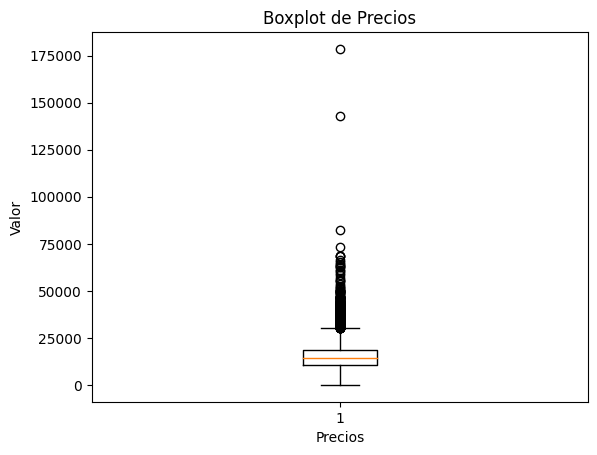

In [171]:
#hago un Boxplot para ver los precios
import matplotlib.pyplot as plt
precios = df4['precio']
plt.boxplot(precios)
plt.xlabel('Precios')
plt.ylabel('Valor')
plt.title('Boxplot de Precios')
plt.show()

In [172]:
#Una vez comprobado que tanto los menores de <1000 y los mayores a >150000 son errores, procedo a eliminarlos:
df5=df4.copy()

In [173]:
minimos_a_eliminar = (df5["precio"] <= 1000) & (df5['fecha_registro'] >= '2000-01-01')
filas_a_eliminar = df5.loc[minimos_a_eliminar].index
df5=df5.drop(filas_a_eliminar)

In [174]:
maximos_a_eliminar = (df5["precio"] >= 100000)
filas_a_eliminar1 = df5.loc[maximos_a_eliminar].index
df5=df5.drop(filas_a_eliminar1)

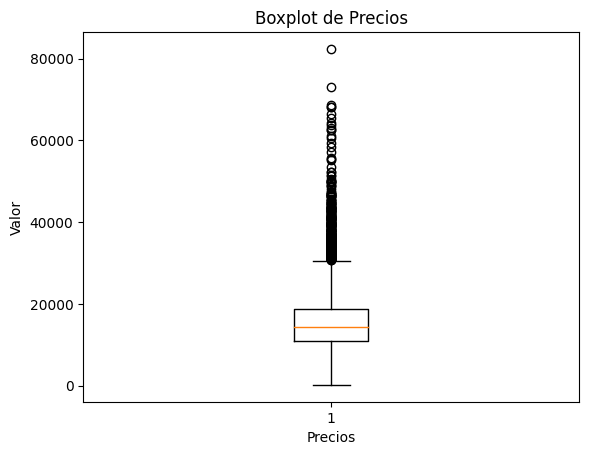

In [175]:
#hago un Boxplot para hacer un check

precios = df5['precio']
plt.boxplot(precios)
plt.xlabel('Precios')
plt.ylabel('Valor')
plt.title('Boxplot de Precios')
plt.show()

In [176]:
df5.loc[df5["precio"] <=1000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
786,525,245302.0,105,1997-01-01,diesel,green,SIN_DATO,False,True,False,SIN_DATO,False,False,True,True,900.0,2018-06-01
3154,525,230578.0,85,1997-07-01,diesel,SIN_COLOR,sedan,False,SIN_DATO,False,False,False,False,True,SIN_DATO,200.0,2018-08-01
3201,525,229880.0,85,1997-07-01,diesel,black,sedan,False,SIN_DATO,False,False,False,SIN_DATO,True,False,200.0,2018-08-01
3210,316,178231.0,77,1999-11-01,petrol,green,sedan,False,False,False,SIN_DATO,False,True,True,False,700.0,2018-02-01
3221,525,230264.0,85,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
3422,318,98097.0,85,1994-01-01,petrol,blue,sedan,True,False,False,False,False,False,True,True,400.0,2018-04-01
3587,525,266641.0,85,1999-03-01,diesel,black,sedan,True,False,False,False,False,False,True,False,800.0,2018-06-01
3625,316,184233.0,77,1999-06-01,petrol,SIN_COLOR,sedan,False,False,False,False,False,False,True,False,400.0,2018-07-01


In [177]:
#hago un check de los precios de erronamente gran valor

In [178]:
df5.loc[df5["precio"] >=100000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [179]:
#Creo la columna antiguedad, para enteder cuantos años tiene el coche desde que se fabricó hasta que se vendio. Porque en mi opinión tiene una correlación de manera directa con el precio. A mayor antiguedad el precio tiene a bajar.(salvo coches de colección pero aqui ninguno lo és)

In [180]:
df5['antiguedad']=df5['fecha_venta']-df5['fecha_registro']

In [181]:
df5.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
1,118,140411.0,100,2012-02-01,diesel,black,SIN_DATO,True,True,False,SIN_DATO,True,SIN_DATO,True,SIN_DATO,11300.0,2018-01-01,2161 days
2,320,183297.0,120,2012-04-01,diesel,white,SIN_DATO,False,False,False,SIN_DATO,True,False,True,False,10200.0,2018-02-01,2132 days
3,335,152352.0,225,2011-05-01,petrol,black,SIN_DATO,True,True,False,False,True,True,True,True,17100.0,2018-02-01,2468 days
4,325,228000.0,145,2013-04-01,diesel,black,SIN_DATO,True,True,False,False,True,False,True,SIN_DATO,13300.0,2018-03-01,1795 days
5,325,205474.0,145,2009-05-01,diesel,SIN_COLOR,SIN_DATO,True,True,False,SIN_DATO,True,SIN_DATO,True,SIN_DATO,11000.0,2018-04-01,3257 days


In [182]:
df6=df5.copy()

In [183]:
#Cominzo a efectuar algunos gráficos para entender los datos:

In [184]:
#GRAFICO DE FECHA REGISTRO Y PRECIO : MIENSTRAS MAS NUEVO EL COCHE MAS CARO ES

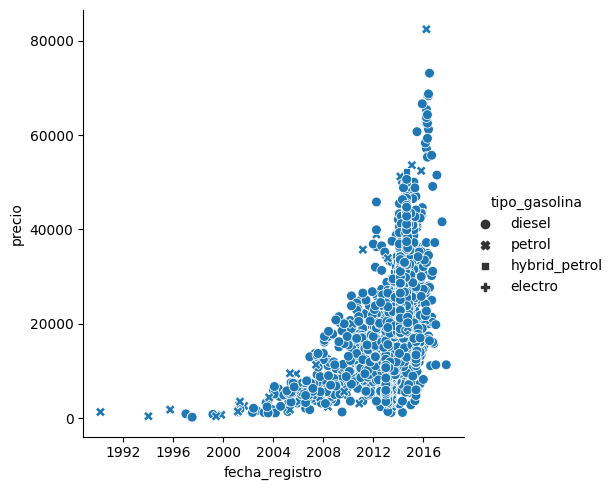

In [185]:
sns.relplot(x='fecha_registro',y='precio',data=df6,style='tipo_gasolina',s=50);

In [186]:
#GRAFICO QUE NOS INDICA QUE MIENTRAS MAS KILOMETROS TIENE EL COCHE MAS BARATO ES

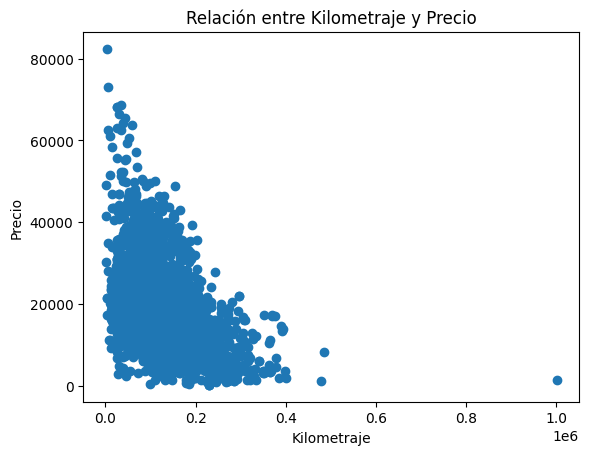

In [187]:
plt.scatter(df6['km'], df6['precio'])
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Relación entre Kilometraje y Precio')
plt.show()

In [188]:
#Grafico que nos muestra que a mayor potencia el precio tiende a aumentar.

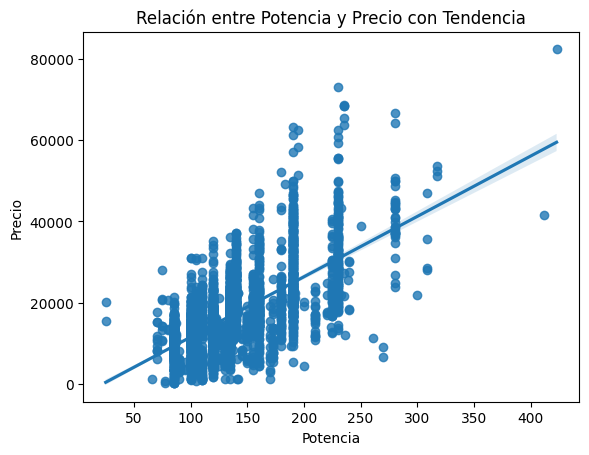

In [189]:
sns.regplot(x='potencia', y='precio', data=df6)
plt.xlabel('Potencia')
plt.ylabel('Precio')
plt.title('Relación entre Potencia y Precio con Tendencia')
plt.show()

In [190]:
#Grafico que nos marta que los Hibrid Petrol son los coches más caros.

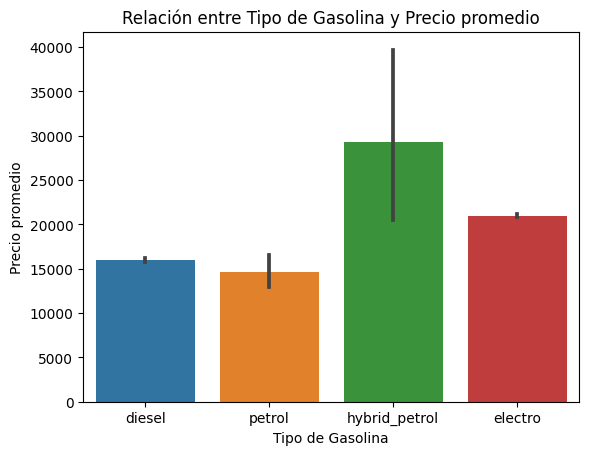

In [191]:
sns.barplot(x='tipo_gasolina', y='precio', data=df6)
plt.xlabel('Tipo de Gasolina')
plt.ylabel('Precio promedio')
plt.title('Relación entre Tipo de Gasolina y Precio promedio')
plt.show()

In [192]:
#Como he dejado el DataFrame para entrar en el Pre Procesamiento:

In [193]:
df6

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
1,118,140411.0,100,2012-02-01,diesel,black,SIN_DATO,True,True,False,SIN_DATO,True,SIN_DATO,True,SIN_DATO,11300.0,2018-01-01,2161 days
2,320,183297.0,120,2012-04-01,diesel,white,SIN_DATO,False,False,False,SIN_DATO,True,False,True,False,10200.0,2018-02-01,2132 days
3,335,152352.0,225,2011-05-01,petrol,black,SIN_DATO,True,True,False,False,True,True,True,True,17100.0,2018-02-01,2468 days
4,325,228000.0,145,2013-04-01,diesel,black,SIN_DATO,True,True,False,False,True,False,True,SIN_DATO,13300.0,2018-03-01,1795 days
5,325,205474.0,145,2009-05-01,diesel,SIN_COLOR,SIN_DATO,True,True,False,SIN_DATO,True,SIN_DATO,True,SIN_DATO,11000.0,2018-04-01,3257 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,X3,137587.0,190,2014-10-01,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01,1369 days
4822,320 Gran Turismo,137063.0,135,2014-08-01,diesel,white,van,False,True,False,SIN_DATO,True,True,True,True,18600.0,2018-04-01,1339 days
4824,225 Active Tourer,33300.0,170,2014-10-01,petrol,SIN_COLOR,van,True,True,False,SIN_DATO,False,False,False,True,19200.0,2018-05-01,1308 days
4825,218 Gran Tourer,24982.0,100,2014-10-01,diesel,red,van,True,False,True,False,False,True,True,SIN_DATO,20200.0,2018-07-01,1369 days


# **SEGUNDA PARTE: PRE PROCESAMIENTO**

In [194]:
#Vemos los valores unicos para entender que tenemos dentro:

In [195]:
for i in df6:
  print(i,df6[i].value_counts())

modelo modelo
320                  728
520                  628
318                  554
X3                   434
116                  356
                    ... 
225                    1
M135                   1
M4                     1
635                    1
225 Active Tourer      1
Name: count, Length: 74, dtype: int64
km km
127499.0    2
116708.0    2
121365.0    2
109195.0    2
116310.0    2
           ..
151391.0    1
127017.0    1
142724.0    1
319724.0    1
27920.0     1
Name: count, Length: 4699, dtype: int64
potencia potencia
135    866
120    778
85     621
100    556
105    435
190    317
140    163
160    150
110    138
230    118
155     99
180     61
225     49
130     47
150     43
90      40
280     32
122     30
173     25
210     21
137     19
125     16
170     13
70      11
145      9
75       8
235      7
142      6
220      5
240      5
127      5
87       5
112      5
309      4
119      4
317      3
107      3
195      3
200      3
80       3
95       3
77  

In [196]:
df6.info() #Que tipos de datos tengo? Veo muchos que son object:

<class 'pandas.core.frame.DataFrame'>
Index: 4757 entries, 1 to 4826
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   modelo                       4757 non-null   object         
 1   km                           4757 non-null   float64        
 2   potencia                     4757 non-null   int64          
 3   fecha_registro               4757 non-null   datetime64[ns] 
 4   tipo_gasolina                4757 non-null   object         
 5   color                        4757 non-null   object         
 6   tipo_coche                   4757 non-null   object         
 7   volante_regulable            4757 non-null   object         
 8   aire_acondicionado           4757 non-null   object         
 9   camara_trasera               4757 non-null   object         
 10  asientos_traseros_plegables  4757 non-null   object         
 11  elevalunas_electrico         4757 n

In [197]:
#Elimino tanto la fecha_registro como la fecha_venta

In [198]:
df6['antiguedad_anios'] = (df6['antiguedad'] / pd.Timedelta(days=365)).round(2)

In [199]:
df6 = df6.drop(['fecha_registro', 'fecha_venta','antiguedad'], axis=1)


In [200]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4757 entries, 1 to 4826
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4757 non-null   object 
 1   km                           4757 non-null   float64
 2   potencia                     4757 non-null   int64  
 3   tipo_gasolina                4757 non-null   object 
 4   color                        4757 non-null   object 
 5   tipo_coche                   4757 non-null   object 
 6   volante_regulable            4757 non-null   object 
 7   aire_acondicionado           4757 non-null   object 
 8   camara_trasera               4757 non-null   object 
 9   asientos_traseros_plegables  4757 non-null   object 
 10  elevalunas_electrico         4757 non-null   object 
 11  bluetooth                    4757 non-null   object 
 12  gps                          4757 non-null   bool   
 13  alerta_lim_velocidad   

In [201]:
#a GPS lo paso a int

In [202]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4757 entries, 1 to 4826
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4757 non-null   object 
 1   km                           4757 non-null   float64
 2   potencia                     4757 non-null   int64  
 3   tipo_gasolina                4757 non-null   object 
 4   color                        4757 non-null   object 
 5   tipo_coche                   4757 non-null   object 
 6   volante_regulable            4757 non-null   object 
 7   aire_acondicionado           4757 non-null   object 
 8   camara_trasera               4757 non-null   object 
 9   asientos_traseros_plegables  4757 non-null   object 
 10  elevalunas_electrico         4757 non-null   object 
 11  bluetooth                    4757 non-null   object 
 12  gps                          4757 non-null   bool   
 13  alerta_lim_velocidad   

In [203]:
#Creamos unas listas para distribuir los Dtype :

In [204]:
target=["precio"]
def obtener_lista_variables(dataset):
    lista_numerica = []
    lista_boolean = []
    lista_categorica = []
    lista_fechas = []

    for i in dataset:
        if (dataset[i].dtype.kind == "f" or dataset[i].dtype.kind == "i") and len(dataset[i].unique()) != 2 and i not in target:
            lista_numerica.append(i)
        elif (dataset[i].dtype.kind == "b" or dataset[i].dtype.kind == "i") and len(dataset[i].unique()) == 2 and i not in target:
            lista_boolean.append(i)
        elif dataset[i].dtype.kind == "O" and i not in target:
            lista_categorica.append(i)
        elif dataset[i].dtype.kind == "m" and i not in target:
            lista_fechas.append(i)

    return lista_numerica, lista_boolean, lista_categorica, lista_fechas

In [205]:
lista_numerica,lista_boolean,lista_categorica,lista_fechas= obtener_lista_variables(df6)

In [206]:
lista_numerica

['km', 'potencia', 'antiguedad_anios']

In [207]:
lista_boolean

['gps']

In [208]:
lista_categorica

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [209]:
lista_fechas

[]

In [210]:
df6['gps']=df6['gps']*1

In [211]:
df6['gps'].dtype

dtype('int64')

In [212]:
lista_numerica.append('gps')

In [213]:
lista_numerica

['km', 'potencia', 'antiguedad_anios', 'gps']

In [214]:
# Busco saber que % de NA hay en cada columna, si es muy alto los elimino.
for col in lista_categorica:
    # Calcular el porcentaje de valores "SIN_DATO" en la columna actual
    sin_dato_count = df6[col].value_counts().get('SIN_DATO', 0)
    total_count = df6[col].count()
    sin_dato_percentage = (sin_dato_count / total_count) * 100

    # Imprimir el resultado
    print(f"Porcentaje de 'SIN_DATO' en la columna '{col}': {sin_dato_percentage:.2f}%")

Porcentaje de 'SIN_DATO' en la columna 'modelo': 0.00%
Porcentaje de 'SIN_DATO' en la columna 'tipo_gasolina': 0.00%
Porcentaje de 'SIN_DATO' en la columna 'color': 0.00%
Porcentaje de 'SIN_DATO' en la columna 'tipo_coche': 30.19%
Porcentaje de 'SIN_DATO' en la columna 'volante_regulable': 0.08%
Porcentaje de 'SIN_DATO' en la columna 'aire_acondicionado': 9.99%
Porcentaje de 'SIN_DATO' en la columna 'camara_trasera': 0.04%
Porcentaje de 'SIN_DATO' en la columna 'asientos_traseros_plegables': 69.77%
Porcentaje de 'SIN_DATO' en la columna 'elevalunas_electrico': 0.04%
Porcentaje de 'SIN_DATO' en la columna 'bluetooth': 15.09%
Porcentaje de 'SIN_DATO' en la columna 'alerta_lim_velocidad': 15.11%


In [215]:
# Iterar sobre las columnas categóricas y veo que ya no me quedan NAN
for col in lista_numerica:
    # Calcular el porcentaje de valores "SIN_DATO" en la columna actual
    sin_dato_count = df6[col].value_counts().get('SIN_DATO', 0)
    total_count = df6[col].count()
    sin_dato_percentage = (sin_dato_count / total_count) * 100

    # Imprimir el resultado
    print(f"Porcentaje de 'SIN_DATO' en la columna '{col}': {sin_dato_percentage:.2f}%")

Porcentaje de 'SIN_DATO' en la columna 'km': 0.00%
Porcentaje de 'SIN_DATO' en la columna 'potencia': 0.00%
Porcentaje de 'SIN_DATO' en la columna 'antiguedad_anios': 0.00%
Porcentaje de 'SIN_DATO' en la columna 'gps': 0.00%


In [216]:
#La columna asientos_trasferos tiene demasiados "SIN DATOS", procedo a eliminar
df6 = df6.drop(['asientos_traseros_plegables'], axis=1)


In [217]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4757 entries, 1 to 4826
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4757 non-null   object 
 1   km                    4757 non-null   float64
 2   potencia              4757 non-null   int64  
 3   tipo_gasolina         4757 non-null   object 
 4   color                 4757 non-null   object 
 5   tipo_coche            4757 non-null   object 
 6   volante_regulable     4757 non-null   object 
 7   aire_acondicionado    4757 non-null   object 
 8   camara_trasera        4757 non-null   object 
 9   elevalunas_electrico  4757 non-null   object 
 10  bluetooth             4757 non-null   object 
 11  gps                   4757 non-null   int64  
 12  alerta_lim_velocidad  4757 non-null   object 
 13  precio                4757 non-null   float64
 14  antiguedad_anios      4757 non-null   float64
dtypes: float64(3), int64(2), o

In [218]:
#Voy a analizar las correlaciones respecto al precio antes de comenzar a transformar , es decir voy a comparar con aquellas que actualmente son numericas.

In [219]:
#Aplico tecnica minMAx para poder transformar numericas aprovecho e incluyo GPS que lo pasa a 1 o 0

In [220]:
minMaxResultado = MinMaxScaler()

In [221]:
lista_numerica

['km', 'potencia', 'antiguedad_anios', 'gps']

In [222]:
df6[lista_numerica] = minMaxResultado.fit_transform(df6[lista_numerica])

In [223]:
df6[lista_numerica]

,km,potencia,antiguedad_anios,gps
1,0.139949,0.188442,0.193748,1.0
2,0.182839,0.238693,0.190840,1.0
3,0.151891,0.502513,0.224282,1.0
4,0.227547,0.301508,0.157397,1.0
5,0.205019,0.301508,0.302799,1.0
...,...,...,...,...
4821,0.137125,0.414573,0.114867,1.0
4822,0.136601,0.276382,0.111959,1.0
4824,0.032827,0.364322,0.108688,0.0
4825,0.024508,0.188442,0.114867,1.0


In [224]:
df6['gps'].unique()

array([1., 0.])

In [225]:

numeric_df = df6.select_dtypes(include=[np.number])


correlacion1 = numeric_df.corr()['precio'].sort_values(ascending=False)

print(correlacion1)


precio              1.000000
potencia            0.682515
gps                -0.014039
km                 -0.418706
antiguedad_anios   -0.438210
Name: precio, dtype: float64


In [226]:
df6.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad_anios
1,118,0.139949,0.188442,diesel,black,SIN_DATO,True,True,False,True,SIN_DATO,1.0,SIN_DATO,11300.0,0.193748
2,320,0.182839,0.238693,diesel,white,SIN_DATO,False,False,False,True,False,1.0,False,10200.0,0.190840
3,335,0.151891,0.502513,petrol,black,SIN_DATO,True,True,False,True,True,1.0,True,17100.0,0.224282
4,325,0.227547,0.301508,diesel,black,SIN_DATO,True,True,False,True,False,1.0,SIN_DATO,13300.0,0.157397
5,325,0.205019,0.301508,diesel,SIN_COLOR,SIN_DATO,True,True,False,True,SIN_DATO,1.0,SIN_DATO,11000.0,0.302799


In [227]:
df7=df6.copy()

In [228]:
#Creo que el Modelo es un factor determinante y utilizo Label Encoder (aqui no tengo nulos y tampoco "sin datos"

In [229]:
le = LabelEncoder()
df7['modelo_numerico']= le.fit_transform(df7['modelo'])

In [230]:
df7.head(10)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad_anios,modelo_numerico
1,118,0.139949,0.188442,diesel,black,SIN_DATO,True,True,False,True,SIN_DATO,1.0,SIN_DATO,11300.0,0.193748,2
2,320,0.182839,0.238693,diesel,white,SIN_DATO,False,False,False,True,False,1.0,False,10200.0,0.190840,21
3,335,0.151891,0.502513,petrol,black,SIN_DATO,True,True,False,True,True,1.0,True,17100.0,0.224282,28
4,325,0.227547,0.301508,diesel,black,SIN_DATO,True,True,False,True,False,1.0,SIN_DATO,13300.0,0.157397,23
5,325,0.205019,0.301508,diesel,SIN_COLOR,SIN_DATO,True,True,False,True,SIN_DATO,1.0,SIN_DATO,11000.0,0.302799,23
6,Z4,0.128477,0.213568,petrol,black,SIN_DATO,True,False,False,False,False,1.0,False,7700.0,0.163213,72
7,118,0.194657,0.201005,diesel,red,SIN_DATO,True,True,False,False,True,1.0,False,9900.0,0.163213,2
8,120,0.240336,0.238693,diesel,grey,SIN_DATO,True,False,False,False,False,1.0,SIN_DATO,5500.0,0.320974,3
9,650,0.023978,0.615578,petrol,grey,SIN_DATO,True,False,False,False,False,1.0,False,6800.0,0.169393,52
10,M3,0.270458,0.530151,petrol,black,SIN_DATO,True,False,False,False,True,1.0,SIN_DATO,12100.0,0.172664,60


In [231]:
lista_categorica

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [232]:
lista_categorica.remove('asientos_traseros_plegables') #como comprobe en unas lineas mas arriba asientos_traseros_plegables tiene un porcenaje de Sin datos muy alto, 69.77%. Lo elimino


In [233]:
lista_categorica

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [234]:
#Quiero ver si se llaman SIN DATO o de que otra manera los valores NA transformados:

In [235]:
for col in lista_categorica:
  unique_values = df7[col].unique()
  print(f"Valores únicos en la columna '{col}':")
  print(unique_values)
  print()

Valores únicos en la columna 'modelo':
['118' '320' '335' '325' 'Z4' '120' '650' 'M3' '218' '520' '318' '316'
 '525' '330' '535' '320 Gran Turismo' '530' '518' '116' '318 Gran Turismo'
 '530 Gran Turismo' '114' '420 Gran Coupé' '730' '528' '123' 'X1' 'X3'
 'X5' 'X6' '218 Gran Tourer' '218 Active Tourer' '216 Gran Tourer' '425'
 '420' '220' '430' '640' 'M235' '430 Gran Coupé' 'M550' '328' 'i3'
 '335 Gran Turismo' '520 Gran Turismo' '435 Gran Coupé' '330 Gran Turismo'
 '418 Gran Coupé' '535 Gran Turismo' '740' '640 Gran Coupé' 'X5 M' 'X4'
 'M4' '750' 'X6 M' '135' '630' '225' '435' '635' '523' '325 Gran Turismo'
 '125' 'M135' '735' 'ActiveHybrid 5' 'M5' 'X5 M50' '216'
 '220 Active Tourer' '216 Active Tourer' '214 Gran Tourer'
 '225 Active Tourer']

Valores únicos en la columna 'tipo_gasolina':
['diesel' 'petrol' 'hybrid_petrol' 'electro']

Valores únicos en la columna 'color':
['black' 'white' 'SIN_COLOR' 'red' 'grey' 'silver' 'blue' 'brown' 'green'
 'beige' 'orange']

Valores únicos en l

In [236]:
#Como no se valorar si la cantidad de columnas 'object' que tengo tienen cierta relacion o no con el precio , las transformo a numéricas incluso aquellas en las que he insertado "sin_dato" con el objetivo de buscar algunas pistas:

In [237]:
#Tipo de Gasolina transformala a numérica:
mapeo_tipo_gasolina = {
    'diesel': 0,
    'petrol': 1,
    'hybrid_petrol': 2,
    'electro': 3,
    'SIN_DATO': 500
}
df7['tipo_gasolina_numerico'] = df7['tipo_gasolina'].map(mapeo_tipo_gasolina)

In [238]:
#Tipo de coche:
mapeo_tipo_coche = {
    'SIN_DATO': 500,
    'convertible': 1,
    'coupe': 2,
    'estate': 3,
    'hatchback': 4,
    'sedan': 5,
    'subcompact': 6,
    'suv': 7,
    'van': 8
}

df7['tipo_coche_numerico'] = df7['tipo_coche'].map(mapeo_tipo_coche)


In [239]:
#Tipo de coche:
mapeo_tipo_color = {
    'SIN_COLOR': 500,
    'black':1,
    'white':2,
    'red':3,
    'silver':4,
    'grey':5,
    'bue':6,
    'orange':7,
    'beige':8,
    'brown':9,
    'green':10,

}

df7['color_numerico'] = df7['color'].map(mapeo_tipo_color)


In [240]:
#A todos estos los transformo para poder tener solo números

In [241]:
df7['volante_regulable_numerico'] = np.where(df7['volante_regulable'] == True, 1,np.where(df7['volante_regulable'] == False, 0, np.where(df7['volante_regulable'] == 'SIN_DATO', 500, np.nan)))


In [242]:
df7['aire_acondicionado_numerico'] = np.where(df7['aire_acondicionado'] == True, 1,np.where(df7['aire_acondicionado'] == False, 0,np.where(df7['aire_acondicionado'] == 'SIN_DATO', 500, np.nan)))


In [243]:
df7['camara_trasera_numerico'] = np.where(df7['camara_trasera'] == True, 1, np.where(df7['camara_trasera'] == False, 0,np.where(df7['camara_trasera'] == 'SIN_DATO', 500, np.nan)))


In [244]:
df7['bluetooth_numerico'] = np.where(df7['bluetooth'] == 'SIN_DATO', 500, np.where(df7['bluetooth'] == False, 1, np.where(df7['bluetooth'] == True, 2, np.nan)))


In [245]:
df7['elevalunas_electrico_numerico'] = np.where(df7['elevalunas_electrico'] == True, 1,np.where(df7['elevalunas_electrico'] == False, 0, np.where(df7['elevalunas_electrico'] == 'SIN_DATO', 500, np.nan)))


In [246]:
df7['alerta_lim_velocidad_numerico'] = np.where(df7['alerta_lim_velocidad'] == 'SIN_DATO', 500, np.where(df7['alerta_lim_velocidad'] == False, 1, np.where(df7['alerta_lim_velocidad'] == True, 2, np.nan)))


In [247]:
df7.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,modelo_numerico,tipo_gasolina_numerico,tipo_coche_numerico,color_numerico,volante_regulable_numerico,aire_acondicionado_numerico,camara_trasera_numerico,bluetooth_numerico,elevalunas_electrico_numerico,alerta_lim_velocidad_numerico
1,118,0.139949,0.188442,diesel,black,SIN_DATO,True,True,False,True,...,2,0,500,1.0,1.0,1.0,0.0,500.0,1.0,500.0
2,320,0.182839,0.238693,diesel,white,SIN_DATO,False,False,False,True,...,21,0,500,2.0,0.0,0.0,0.0,1.0,1.0,1.0
3,335,0.151891,0.502513,petrol,black,SIN_DATO,True,True,False,True,...,28,1,500,1.0,1.0,1.0,0.0,2.0,1.0,2.0
4,325,0.227547,0.301508,diesel,black,SIN_DATO,True,True,False,True,...,23,0,500,1.0,1.0,1.0,0.0,1.0,1.0,500.0
5,325,0.205019,0.301508,diesel,SIN_COLOR,SIN_DATO,True,True,False,True,...,23,0,500,500.0,1.0,1.0,0.0,500.0,1.0,500.0


In [248]:
df7 #tabla con todos los valores incluyendo las columnas a eliminar

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,modelo_numerico,tipo_gasolina_numerico,tipo_coche_numerico,color_numerico,volante_regulable_numerico,aire_acondicionado_numerico,camara_trasera_numerico,bluetooth_numerico,elevalunas_electrico_numerico,alerta_lim_velocidad_numerico
1,118,0.139949,0.188442,diesel,black,SIN_DATO,True,True,False,True,...,2,0,500,1.0,1.0,1.0,0.0,500.0,1.0,500.0
2,320,0.182839,0.238693,diesel,white,SIN_DATO,False,False,False,True,...,21,0,500,2.0,0.0,0.0,0.0,1.0,1.0,1.0
3,335,0.151891,0.502513,petrol,black,SIN_DATO,True,True,False,True,...,28,1,500,1.0,1.0,1.0,0.0,2.0,1.0,2.0
4,325,0.227547,0.301508,diesel,black,SIN_DATO,True,True,False,True,...,23,0,500,1.0,1.0,1.0,0.0,1.0,1.0,500.0
5,325,0.205019,0.301508,diesel,SIN_COLOR,SIN_DATO,True,True,False,True,...,23,0,500,500.0,1.0,1.0,0.0,500.0,1.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,X3,0.137125,0.414573,diesel,blue,van,True,True,True,True,...,65,0,8,NaN,1.0,1.0,1.0,1.0,1.0,2.0
4822,320 Gran Turismo,0.136601,0.276382,diesel,white,van,False,True,False,True,...,22,0,8,2.0,0.0,1.0,0.0,2.0,1.0,2.0
4824,225 Active Tourer,0.032827,0.364322,petrol,SIN_COLOR,van,True,True,False,False,...,17,1,8,500.0,1.0,1.0,0.0,1.0,0.0,2.0
4825,218 Gran Tourer,0.024508,0.188442,diesel,red,van,True,False,True,False,...,13,0,8,3.0,1.0,0.0,1.0,2.0,0.0,500.0


In [249]:
correlacion=df7.corr(numeric_only=True) #analisis de correlacion

In [250]:
correlacion.style.background_gradient(cmap='coolwarm')

,km,potencia,gps,precio,antiguedad_anios,modelo_numerico,tipo_gasolina_numerico,tipo_coche_numerico,color_numerico,volante_regulable_numerico,aire_acondicionado_numerico,camara_trasera_numerico,bluetooth_numerico,elevalunas_electrico_numerico,alerta_lim_velocidad_numerico
km,1.000000,-0.038368,0.160275,-0.418706,0.366036,-0.014398,-0.066830,-0.001263,0.008791,0.021815,0.010812,0.007684,0.019261,-0.008181,-0.010482
potencia,-0.038368,1.000000,0.000610,0.682515,-0.138822,0.543559,0.110208,-0.011359,-0.008078,0.003399,0.001919,0.002302,0.023306,0.069674,-0.014347
gps,0.160275,0.000610,1.000000,-0.014039,0.055622,-0.059096,-0.031749,-0.003996,-0.012256,0.015635,-0.001574,0.007630,0.011292,0.014819,0.020635
precio,-0.418706,0.682515,-0.014039,1.000000,-0.438210,0.511952,0.000525,-0.010962,-0.013277,-0.011747,-0.020458,0.004117,0.018466,0.053654,-0.005846
antiguedad_anios,0.366036,-0.138822,0.055622,-0.438210,1.000000,-0.042543,0.128623,-0.023249,0.000932,0.017239,0.025078,0.002888,0.010822,-0.008645,-0.001501
modelo_numerico,-0.014398,0.543559,-0.059096,0.511952,-0.042543,1.000000,0.007277,-0.010621,-0.031707,-0.008015,0.005242,0.003397,0.021509,0.024663,-0.020473
tipo_gasolina_numerico,-0.066830,0.110208,-0.031749,0.000525,0.128623,0.007277,1.000000,-0.016228,0.009556,-0.005648,0.014683,-0.003777,0.014048,-0.003936,0.019249
tipo_coche_numerico,-0.001263,-0.011359,-0.003996,-0.010962,-0.023249,-0.010621,-0.016228,1.000000,-0.004890,0.027387,0.005536,-0.013488,0.002899,-0.014098,-0.010329
color_numerico,0.008791,-0.008078,-0.012256,-0.013277,0.000932,-0.031707,0.009556,-0.004890,1.000000,-0.011752,-0.010580,0.026661,-0.005461,0.027371,0.002560
volante_regulable_numerico,0.021815,0.003399,0.015635,-0.011747,0.017239,-0.008015,-0.005648,0.027387,-0.011752,1.000000,0.038018,-0.000905,-0.012097,0.000586,0.007867


In [251]:
df7.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,modelo_numerico,tipo_gasolina_numerico,tipo_coche_numerico,color_numerico,volante_regulable_numerico,aire_acondicionado_numerico,camara_trasera_numerico,bluetooth_numerico,elevalunas_electrico_numerico,alerta_lim_velocidad_numerico
1,118,0.139949,0.188442,diesel,black,SIN_DATO,True,True,False,True,...,2,0,500,1.0,1.0,1.0,0.0,500.0,1.0,500.0
2,320,0.182839,0.238693,diesel,white,SIN_DATO,False,False,False,True,...,21,0,500,2.0,0.0,0.0,0.0,1.0,1.0,1.0
3,335,0.151891,0.502513,petrol,black,SIN_DATO,True,True,False,True,...,28,1,500,1.0,1.0,1.0,0.0,2.0,1.0,2.0
4,325,0.227547,0.301508,diesel,black,SIN_DATO,True,True,False,True,...,23,0,500,1.0,1.0,1.0,0.0,1.0,1.0,500.0
5,325,0.205019,0.301508,diesel,SIN_COLOR,SIN_DATO,True,True,False,True,...,23,0,500,500.0,1.0,1.0,0.0,500.0,1.0,500.0


In [252]:
df8=df7.copy()

In [253]:
#Hago limpieza y elimino tablas ya "duplicadas" o que tienen valores previos a su transformacion.

In [254]:
df8 = df8.drop(['modelo','tipo_gasolina','color','bluetooth','tipo_coche','volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','alerta_lim_velocidad'], axis=1)


In [255]:
df8.head()

,km,potencia,gps,precio,antiguedad_anios,modelo_numerico,tipo_gasolina_numerico,tipo_coche_numerico,color_numerico,volante_regulable_numerico,aire_acondicionado_numerico,camara_trasera_numerico,bluetooth_numerico,elevalunas_electrico_numerico,alerta_lim_velocidad_numerico
1,0.139949,0.188442,1.0,11300.0,0.193748,2,0,500,1.0,1.0,1.0,0.0,500.0,1.0,500.0
2,0.182839,0.238693,1.0,10200.0,0.190840,21,0,500,2.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.151891,0.502513,1.0,17100.0,0.224282,28,1,500,1.0,1.0,1.0,0.0,2.0,1.0,2.0
4,0.227547,0.301508,1.0,13300.0,0.157397,23,0,500,1.0,1.0,1.0,0.0,1.0,1.0,500.0
5,0.205019,0.301508,1.0,11000.0,0.302799,23,0,500,500.0,1.0,1.0,0.0,500.0,1.0,500.0


In [256]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4757 entries, 1 to 4826
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   km                             4757 non-null   float64
 1   potencia                       4757 non-null   float64
 2   gps                            4757 non-null   float64
 3   precio                         4757 non-null   float64
 4   antiguedad_anios               4757 non-null   float64
 5   modelo_numerico                4757 non-null   int64  
 6   tipo_gasolina_numerico         4757 non-null   int64  
 7   tipo_coche_numerico            4757 non-null   int64  
 8   color_numerico                 4132 non-null   float64
 9   volante_regulable_numerico     4757 non-null   float64
 10  aire_acondicionado_numerico    4757 non-null   float64
 11  camara_trasera_numerico        4757 non-null   float64
 12  bluetooth_numerico             4757 non-null   float6

In [257]:
#Ordeno las columnas segun creo que tienen mas relevancia respecto a su correlación

In [258]:
orden_columnas=['precio','potencia','modelo_numerico','antiguedad_anios','km']+list(df8.columns.difference(['precio','modelo_numerico','km','potencia','antiguedad_anios']))

In [259]:
df8=df8[orden_columnas]

In [260]:
df8.reset_index(drop=True)

,precio,potencia,modelo_numerico,antiguedad_anios,km,aire_acondicionado_numerico,alerta_lim_velocidad_numerico,bluetooth_numerico,camara_trasera_numerico,color_numerico,elevalunas_electrico_numerico,gps,tipo_coche_numerico,tipo_gasolina_numerico,volante_regulable_numerico
0,11300.0,0.188442,2,0.193748,0.139949,1.0,500.0,500.0,0.0,1.0,1.0,1.0,500,0,1.0
1,10200.0,0.238693,21,0.190840,0.182839,0.0,1.0,1.0,0.0,2.0,1.0,1.0,500,0,0.0
2,17100.0,0.502513,28,0.224282,0.151891,1.0,2.0,2.0,0.0,1.0,1.0,1.0,500,1,1.0
3,13300.0,0.301508,23,0.157397,0.227547,1.0,500.0,1.0,0.0,1.0,1.0,1.0,500,0,1.0
4,11000.0,0.301508,23,0.302799,0.205019,1.0,500.0,500.0,0.0,500.0,1.0,1.0,500,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,19500.0,0.414573,65,0.114867,0.137125,1.0,2.0,1.0,1.0,NaN,1.0,1.0,8,0,1.0
4753,18600.0,0.276382,22,0.111959,0.136601,1.0,2.0,2.0,0.0,2.0,1.0,1.0,8,0,0.0
4754,19200.0,0.364322,17,0.108688,0.032827,1.0,2.0,1.0,0.0,500.0,0.0,0.0,8,1,1.0
4755,20200.0,0.188442,13,0.114867,0.024508,0.0,500.0,2.0,1.0,3.0,0.0,1.0,8,0,1.0


In [261]:
df8.head()

,precio,potencia,modelo_numerico,antiguedad_anios,km,aire_acondicionado_numerico,alerta_lim_velocidad_numerico,bluetooth_numerico,camara_trasera_numerico,color_numerico,elevalunas_electrico_numerico,gps,tipo_coche_numerico,tipo_gasolina_numerico,volante_regulable_numerico
1,11300.0,0.188442,2,0.193748,0.139949,1.0,500.0,500.0,0.0,1.0,1.0,1.0,500,0,1.0
2,10200.0,0.238693,21,0.190840,0.182839,0.0,1.0,1.0,0.0,2.0,1.0,1.0,500,0,0.0
3,17100.0,0.502513,28,0.224282,0.151891,1.0,2.0,2.0,0.0,1.0,1.0,1.0,500,1,1.0
4,13300.0,0.301508,23,0.157397,0.227547,1.0,500.0,1.0,0.0,1.0,1.0,1.0,500,0,1.0
5,11000.0,0.301508,23,0.302799,0.205019,1.0,500.0,500.0,0.0,500.0,1.0,1.0,500,0,1.0


In [262]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4757 entries, 1 to 4826
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   precio                         4757 non-null   float64
 1   potencia                       4757 non-null   float64
 2   modelo_numerico                4757 non-null   int64  
 3   antiguedad_anios               4757 non-null   float64
 4   km                             4757 non-null   float64
 5   aire_acondicionado_numerico    4757 non-null   float64
 6   alerta_lim_velocidad_numerico  4757 non-null   float64
 7   bluetooth_numerico             4757 non-null   float64
 8   camara_trasera_numerico        4757 non-null   float64
 9   color_numerico                 4132 non-null   float64
 10  elevalunas_electrico_numerico  4757 non-null   float64
 11  gps                            4757 non-null   float64
 12  tipo_coche_numerico            4757 non-null   int64 

In [263]:
correlacion2=df8.corr(numeric_only=True) #analisis de correlacion FINAL de toda la tabla. Correlacion alta con potencia,modelo,antiguedad del coche y kms del mismo.

In [264]:
correlacion2.style.background_gradient(cmap='coolwarm')

,precio,potencia,modelo_numerico,antiguedad_anios,km,aire_acondicionado_numerico,alerta_lim_velocidad_numerico,bluetooth_numerico,camara_trasera_numerico,color_numerico,elevalunas_electrico_numerico,gps,tipo_coche_numerico,tipo_gasolina_numerico,volante_regulable_numerico
precio,1.000000,0.682515,0.511952,-0.438210,-0.418706,-0.020458,-0.005846,0.018466,0.004117,-0.013277,0.053654,-0.014039,-0.010962,0.000525,-0.011747
potencia,0.682515,1.000000,0.543559,-0.138822,-0.038368,0.001919,-0.014347,0.023306,0.002302,-0.008078,0.069674,0.000610,-0.011359,0.110208,0.003399
modelo_numerico,0.511952,0.543559,1.000000,-0.042543,-0.014398,0.005242,-0.020473,0.021509,0.003397,-0.031707,0.024663,-0.059096,-0.010621,0.007277,-0.008015
antiguedad_anios,-0.438210,-0.138822,-0.042543,1.000000,0.366036,0.025078,-0.001501,0.010822,0.002888,0.000932,-0.008645,0.055622,-0.023249,0.128623,0.017239
km,-0.418706,-0.038368,-0.014398,0.366036,1.000000,0.010812,-0.010482,0.019261,0.007684,0.008791,-0.008181,0.160275,-0.001263,-0.066830,0.021815
aire_acondicionado_numerico,-0.020458,0.001919,0.005242,0.025078,0.010812,1.000000,-0.007502,-0.001316,-0.005580,-0.010580,-0.007411,-0.001574,0.005536,0.014683,0.038018
alerta_lim_velocidad_numerico,-0.005846,-0.014347,-0.020473,-0.001501,-0.010482,-0.007502,1.000000,0.000819,0.019848,0.002560,-0.008622,0.020635,-0.010329,0.019249,0.007867
bluetooth_numerico,0.018466,0.023306,0.021509,0.010822,0.019261,-0.001316,0.000819,1.000000,0.049630,-0.005461,-0.008053,0.011292,0.002899,0.014048,-0.012097
camara_trasera_numerico,0.004117,0.002302,0.003397,0.002888,0.007684,-0.005580,0.019848,0.049630,1.000000,0.026661,0.001616,0.007630,-0.013488,-0.003777,-0.000905
color_numerico,-0.013277,-0.008078,-0.031707,0.000932,0.008791,-0.010580,0.002560,-0.005461,0.026661,1.000000,0.027371,-0.012256,-0.004890,0.009556,-0.011752
